<a href="https://colab.research.google.com/github/AveDavis/Projects/blob/main/FakeNewModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection

-https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset




> **Warning:**  Only Run Prepare Workspace One time!


In [4]:
# Mount my google drive so that data can be acessed
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Prepare Workspace

---

2. retrieve data from kaggle API.
   
   **A.)** Create folder called kaggle to store json key with path "/content/gdrive/My Drive/Kaggle".
   
   **B.)** Retrive key from kaggel and place it in the new folder the file will be named "kaggle.json".
   
   **C.)** Set the Kaggle API key configuration path in Google Colab environment.


---

   


In [5]:
# where are we?
#!pwd

/content


In [6]:
# make folder called Kaggel to hold json token
#!cd gdrive/MyDrive/
#!mkdir Kaggle

In [7]:
import os
# config path to file kaggel.json
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [8]:
# move to new folder
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [9]:
# download data sets
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# Check contents of file
!ls

fake-and-real-news-dataset.zip	Fake.csv  Kaggle  kaggle.json  True.csv


In [11]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  fake-and-real-news-dataset.zip
replace Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Upload data and assign labels
---

In [26]:
#upload the needed libarys
import numpy as np
import pandas as pd
#import kaggle

In [27]:
# Upload True data
true = pd.read_csv('True.csv')
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [28]:
# Upload fake data
fake = pd.read_csv('Fake.csv')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [29]:
# Label and combine data
true['label'] = 1
fake['label'] = 0

# Use the the first 5000 data of true and fake dataset for building the model.
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

# use all the data
#frames = [true, fake]

df = pd.concat(frames)
df.shape

(10002, 5)

In [30]:
# create dependent and independent variables
X = df. drop('label', axis=1)
y = df['label']

In [31]:
#drop missing data
df = df.dropna()
df2 = df.copy()

# add index column for building the corpus
df2.reset_index(inplace=True)
df2['text'] = df2['text'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    10002 non-null  int64 
 1   title    10002 non-null  object
 2   text     10002 non-null  object
 3   subject  10002 non-null  object
 4   date     10002 non-null  object
 5   label    10002 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 469.0+ KB


In [32]:
print(df2['text'].isna().sum())

0


## Preprocessing
---

In this section we create the corpus and then vectorize our data. To begin to create the corpus we must remove all punctuation and stop words. The stop words used in this occasion are from nltk and no more have been added. Then we make all of our strings lowercase for consistency, and lastly we stem our tokens. The stemming is done via the nltk [snowball](https://www.nltk.org/api/nltk.stem.snowball.html?highlight=stemmer#nltk.stem.snowball.EnglishStemmer) algorithm. Snowball is an agressive stemmer but it is the most computaionally efficent and will work for our purposes.

Lastly we use[TFID Vecotrizor](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from sklearn. This allows us to use the term frequency inverse document frequency metrics for detecting fake news.

In [33]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
snowball_stemmer = SnowballStemmer(language='english')
stopwords_set = set(stopwords.words('english'))

corpus = []

for i in range(0, len(df2)):
    # Using SnowballStemmer
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()

    review = [snowball_stemmer.stem(word) for word in review if word not in stopwords_set]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

## EDA

In [125]:
len(set(corpus))

9963

[('reuter highlight u presid donald trump administr thursday unit state drop massiv gbu bomb largest non nuclear bomb ever use combat afghanistan seri cave use islam state milit pentagon say trump say pyongyang problem taken care amid specul north korea verg sixth nuclear test militari forc cannot resolv tension north korea china warn influenti chines newspap urg pyongyang halt nuclear program exchang beij protect trump administr focus north korea strategi tougher econom sanction possibl includ intercept cargo ship punish chines bank busi pyongyang u offici say trump say thing work fine unit state russia day declar u russian relat may time low trump signal could move closer mainstream monetari polici say rule reappoint janet yellen feder reserv chair consid choic u central bank nl n hl b trump sign resolut allow u state restrict feder fund contracept reproduct health spent move cheer anti abort campaign democrat senat chris van hollen press deutsch bank releas inform issu includ trump 

## Classifiers

### Logit Model

In [44]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [45]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize the Logistic Regression model
logit_classifier = LogisticRegression()

# Fit the model on the training data
logit_classifier.fit(X_train, y_train)

# Make predictions on the testing data
pred = logit_classifier.predict(X_test)

# Calculate and print accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

Accuracy: 0.995


In [38]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization


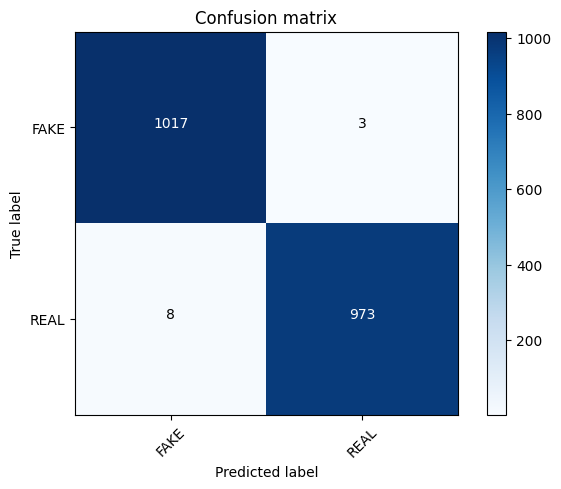

In [39]:
import itertools
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [40]:
from sklearn.metrics import classification_report, f1_score

# Assuming 'y_test' is your true labels
f1 = f1_score(y_test, pred, average='binary')  # Set average='macro' for multiclass problems

print("F1 Score:", f1)

# Generate a classification report
classification_rep = classification_report(y_test, pred)
print("Classification Report:\n", classification_rep)


F1 Score: 0.9943791517629024
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1020
           1       1.00      0.99      0.99       981

    accuracy                           0.99      2001
   macro avg       0.99      0.99      0.99      2001
weighted avg       0.99      0.99      0.99      2001



### Muiltinomial Niave Bayes

Accuracy: 0.972
Confusion matrix, without normalization


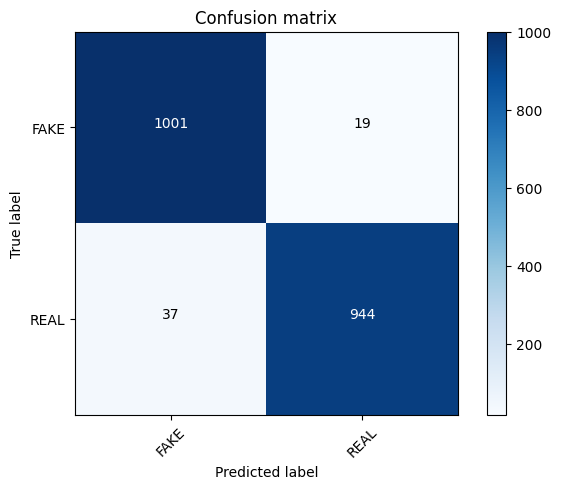

In [42]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
pred = classifier.predict(X_test)

# Calculate and print accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
# Assuming 'y_test' is your true labels
f1 = f1_score(y_test, pred, average='binary')  # Set average='macro' for multiclass problems

print("F1 Score:", f1)

# Generate a classification report
classification_rep = classification_report(y_test, pred)
print("Classification Report:\n", classification_rep)


F1 Score: 0.97119341563786
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1020
           1       0.98      0.96      0.97       981

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001

